### Problem Statement Description:
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.
### Objective
 To build a regression model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

### Business Objective and Constraints:
1. No strict Latency concerns
2. Error residuals should be minimized as much as possible

### Data Overview:
a. Data will be in csv format  

b. Train data contains 12 columns with some masked features(masking means hiding the actual     
representation of data and replacing with some other code)  

c.Total training data is 550068 data points with most of the features wtih categorical variables

### Performance metrics:
The model performance will be evaluated on the basis of RMSE score. RMSE is very common and is a suitable general-purpose error metric. Compared to the Mean Absolute Error, RMSE punishes large errors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv("black_friday_train.csv")
print(df.shape)
df.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [10]:
##checking duplicate entries
dftt= df.drop_duplicates(subset={"User_ID","Product_ID","Product_Category_1",'Product_Category_2', 'Product_Category_3'}, keep='first', inplace=False)
dftt.shape


(550068, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
#checking how many categories are there in product category's columns
for i in df.columns:
    print("The number of categories is {} in {} ".format(len(df[i].value_counts()), i))

The number of categories is 5891 in User_ID 
The number of categories is 3631 in Product_ID 
The number of categories is 2 in Gender 
The number of categories is 7 in Age 
The number of categories is 21 in Occupation 
The number of categories is 3 in City_Category 
The number of categories is 5 in Stay_In_Current_City_Years 
The number of categories is 2 in Marital_Status 
The number of categories is 20 in Product_Category_1 
The number of categories is 17 in Product_Category_2 
The number of categories is 15 in Product_Category_3 
The number of categories is 18105 in Purchase 


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
pp=df['Product_Category_2'].isnull().value_counts()
print((pp.to_dict()).values())
(pp.to_dict()).keys()

dict_values([376430, 173638])


dict_keys([False, True])

In [7]:
conversion_to_dict= pp.to_dict()
conversion_to_dict.get(True)

173638

In [4]:
for i in df.columns:
    x= (df[i].isnull().value_counts()).to_dict()
    if x.get(True):
        print("The % of missing values in " + i + " column is {}%".format((x.get(True)/len(df))*100))
#         print(round(x.get(True)/len(df))*100)

The % of missing values in Product_Category_2 column is 31.56664266963357%
The % of missing values in Product_Category_3 column is 69.67265865311198%


In [9]:
#checking the percentage of null values
x= df['Product_Category_2'].isnull().value_counts()
print("The % of missing value in category 2 is {} %".format(round((x[True]/ len(df))*100)))
x= df['Product_Category_3'].isnull().value_counts()
print("The % of missing value in category 3 is {} %".format(round((x[True]/ len(df))*100)))

The % of missing value in category 2 is 32.0 %
The % of missing value in category 3 is 70.0 %


In [4]:
#since the null values for Product category 3 is high ~>70% we drop this column
df.drop(['Product_Category_3'], axis=1, inplace=True)

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969


## Univariate Analysis

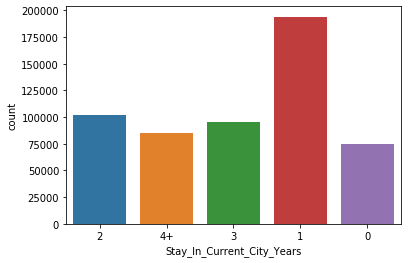

In [12]:
sns.countplot(df['Stay_In_Current_City_Years'])

From the count plot of 'Stay_In_Current_City_Years' we can see that most users in our data have been staying in that same city for about 1 year

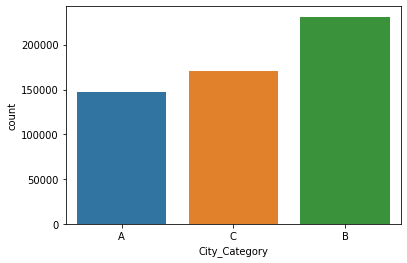

In [13]:
sns.countplot(df['City_Category'])

Most users are from city category B 

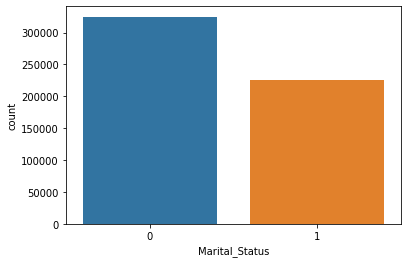

In [14]:
sns.countplot(df['Marital_Status'])

According to data , mostly single people tends to buy in the black friday sales

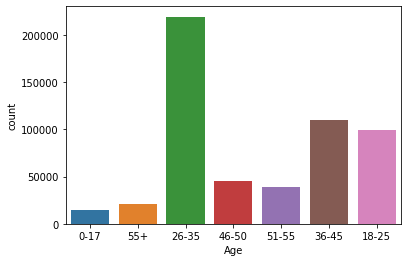

In [15]:
sns.countplot(df['Age'])

Majority Customers for black friday sales are from age groups 26-35

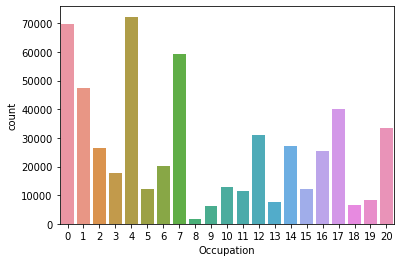

In [16]:
sns.countplot(df['Occupation'])

Here the occupation details are hidden/masked. But from plot we can see that people belonging to occupation category 0, 4, 7 tends to purchase more on black friday sales.

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64


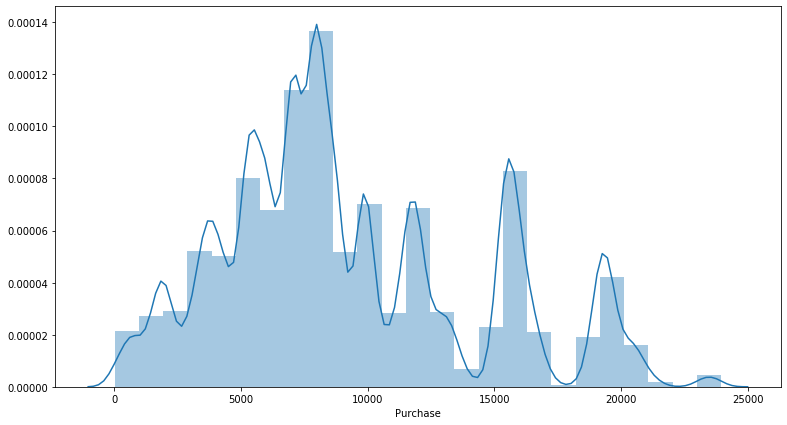

In [17]:
plt.figure(figsize=(13,7))
sns.distplot(df['Purchase'], bins=25)
print(df['Purchase'].describe())

Here the sales purchase price somehow follows normal distribution but again is widely spreaded

### Bivariate Analysis

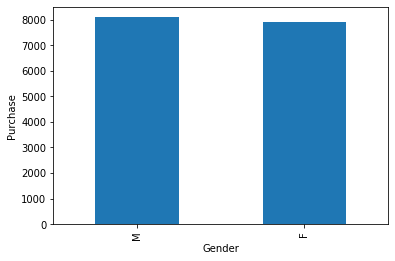

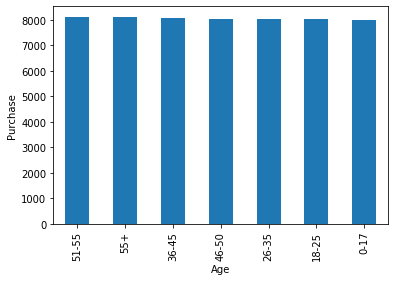

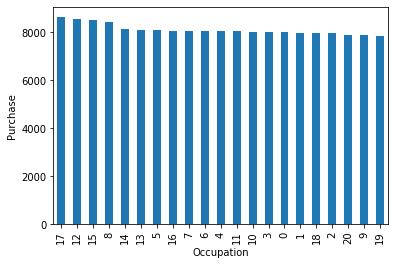

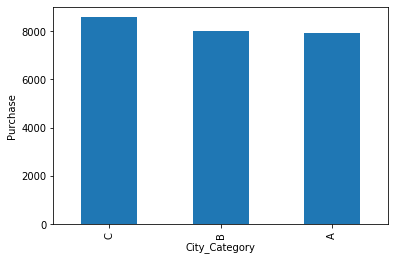

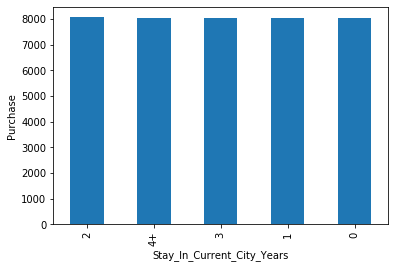

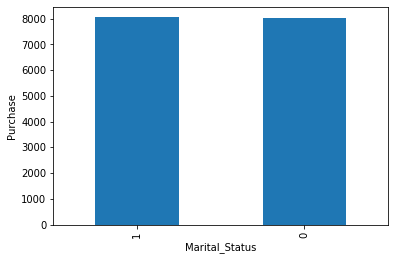

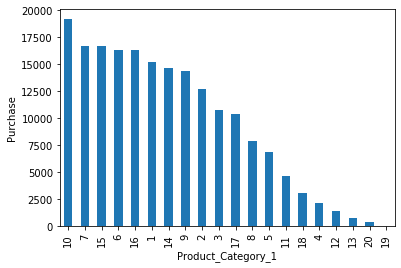

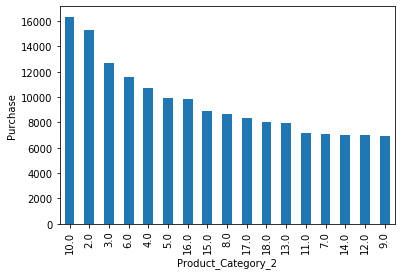

In [18]:
categorical_features= [feature for feature in df.columns if feature not in ['Product_ID', 'User_ID', 'Purchase']]
for features in categorical_features:
    df.groupby(features)['Purchase'].median().sort_values(ascending= False).plot.bar()
    plt.xlabel(features)
    plt.ylabel('Purchase')
    plt.show()
    

In [19]:
##Insight we get from above plots....
# In above chart we plot the purchse vs individual feature graph to see how much the purchase is 
# ...related or impacted by these features
# From Geographic point of view
# ...People From City category C tends to purchase more than city category A and B, although from the count plot we
#....can see that there are more users form city B but users from city C tends to buy more 
# From the plot of product_category_1 and Purchse.. we can see that user who bought products from product category 
#.... 10 tends to have high purchase, we can think may be product from that category must be costly

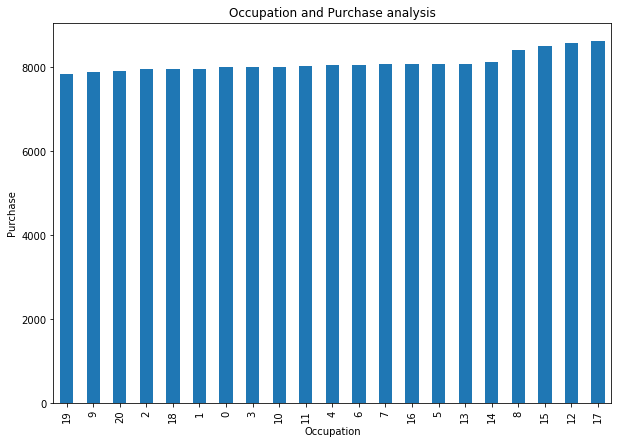

In [20]:
df.groupby('Occupation')['Purchase'].median().sort_values(ascending=True).plot.bar(figsize=(10,7))
plt.xlabel('Occupation')
plt.ylabel('Purchase')

plt.title("Occupation and Purchase analysis")
plt.show()

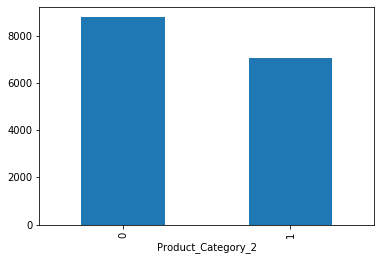

In [12]:
dft= df.copy()
dft['Product_Category_2']= np.where(dft['Product_Category_2'].isnull(), 1,0)
dft.groupby('Product_Category_2')['Purchase'].median().plot.bar()
plt.show()

From above figure it is shown that features with missing value tends to have less sales i.e missing values are affecting our price of purchases. One assumption that can be made that user's might not want to disclose product item they bought, the data points might be MNAR(Missing not at random). 

#### Feature Engineering

In [6]:
#Capturing NAN value importance by adding extra column
df['Product_Category_2_NaN']= np.where(df['Product_Category_2'].isnull(),1,0)


In [7]:
#imputing median for missing Product_Category_2 column
df['Product_Category_2'].fillna(df.Product_Category_2.median(), inplace=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Product_Category_2_NaN
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,8370,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,1422,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,7969,1


In [8]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [6]:
# #replacing staying current city years value from 4+ to 4 as 4+ is not of numeric type
# df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].replace({'4+': 4})

# #converting the column into numeric type
# df['Stay_In_Current_City_Years']= pd.to_numeric(df['Stay_In_Current_City_Years'])

# #converting gender into binary category 1->male,  0->female
# df['Gender']= df['Gender'].replace({'M': 1, 'F':0})

# #converting string type city category to numerical category
# df['City_Category']= df['City_Category'].replace({'A':1, 'B': 2, 'C':3})

# #converting Age into numeric category
# df['Age']= df['Age'].replace({'0-17':0, '18-25': 1, '26-35':2, '36-45':3, '46-50':4,'51-55':5, '55+':6})



In [9]:
df_Age= pd.get_dummies(df.Age, drop_first=True)
df= pd.concat([df, df_Age], axis=1)
df.drop("Age", axis=1, inplace= True)

In [10]:
df_City_Category= pd.get_dummies(df.City_Category, drop_first=True)
df= pd.concat([df, df_City_Category], axis=1)
df.drop("City_Category", axis=1, inplace= True)

In [11]:
df_Gender= pd.get_dummies(df.Gender, drop_first=True)
df= pd.concat([df, df_Gender], axis=1)
df.drop("Gender", axis=1, inplace= True)

In [12]:
df_Stay_In_Current_City_Years= pd.get_dummies(df.Stay_In_Current_City_Years, drop_first=True)
df= pd.concat([df, df_Stay_In_Current_City_Years], axis=1)
df.drop("Stay_In_Current_City_Years", axis=1, inplace= True)

In [13]:
pd.set_option('display.max_columns', None)
df.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Product_Category_2_NaN,18-25,26-35,36-45,46-50,51-55,55+,B,C,M,1,2,3,4+
0,1000001,P00069042,10,0,3,9.0,8370,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1000001,P00248942,10,0,1,6.0,15200,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1000001,P00087842,10,0,12,9.0,1422,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1000001,P00085442,10,0,12,14.0,1057,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1000002,P00285442,16,0,8,9.0,7969,1,0,0,0,0,0,1,0,1,1,0,0,0,1


In [14]:
# corr= df.corr()
# plt.figure(figsize=(13,7))
# sns.heatmap(corr, annot=True)

In [15]:
##if there is multicollinearity in the dataset we remove those independent collinear features
def correlation(dataset, threshold):
    corr_matrix= dataset.corr()
    col_corr= set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])> threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
                

In [16]:
corr_features= correlation(df, 0.7)
len(set(corr_features))

0

In [17]:
df.tail()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Product_Category_2_NaN,18-25,26-35,36-45,46-50,51-55,55+,B,C,M,1,2,3,4+
550063,1006033,P00372445,13,1,20,9.0,368,1,0,0,0,0,1,0,1,0,1,1,0,0,0
550064,1006035,P00375436,1,0,20,9.0,371,1,0,1,0,0,0,0,0,1,0,0,0,1,0
550065,1006036,P00375436,15,1,20,9.0,137,1,0,1,0,0,0,0,1,0,0,0,0,0,1
550066,1006038,P00375436,1,0,20,9.0,365,1,0,0,0,0,0,1,0,1,0,0,1,0,0
550067,1006039,P00371644,0,1,20,9.0,490,1,0,0,0,1,0,0,1,0,0,0,0,0,1


In [18]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Product_Category_2_NaN,18-25,26-35,36-45,46-50,51-55,55+,B,C,M,1,2,3,4+
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.576434,9263.968713,0.315666,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093,0.420263,0.311189,0.753105,0.352358,0.185137,0.173224,0.154028
std,1.727592e+03,6.522660,0.491770,3.936211,4.226025,5023.065394,0.464781,0.385166,0.489734,0.400000,0.276007,0.255136,0.193817,0.493601,0.462980,0.431205,0.477705,0.388409,0.378441,0.360976
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,5823.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,8047.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,12054.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,23961.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
X= df.drop(['User_ID', 'Product_ID', 'Purchase'], axis=1, inplace=False)
y= df['Purchase']

## Model Training

### 1.Trying random Model

In [17]:
#splitting the dataset into train test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 42, test_size= 0.20 )

In [18]:
np.random.seed(0)
from sklearn.metrics import mean_squared_error
predd= np.random.randint(23962, size= len(y_test))
print("RMSE result:", np.sqrt(mean_squared_error(y_test, predd)))

RMSE result: 8947.32352332288


### 2. Linear Regression

In [21]:
# from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
def train(model,X, y):
    #doing train test split
    x_train, x_test, y_train, y_test= train_test_split(X, y, random_state=42, test_size= 0.20)
    model.fit(x_train, y_train)
    
    #predicting the result:
    train_pred= model.predict(x_train)
    test_pred= model.predict(x_test)
    
     ## FOR RMSE
    train_RMSE= np.sqrt(mean_squared_error(y_train, train_pred))
    print("Train RMSE is: ", train_RMSE)
    
    #cross validation RMSE 
    cv_score= cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
    cv_score= np.abs(np.mean(cv_score))
    print("Test cv RMSE score: ", np.sqrt(cv_score))
    
    #FOR R2_Score
    print("Training r2_score: ", r2_score(y_train, train_pred))
    #Cross validation r_2 score
    r2_cv_score= cross_val_score(model, X, y, scoring='r2', cv=5)
    r2_cv_score= np.mean(r2_cv_score)
    print("Test cv r2_score: ", r2_cv_score)
    


Train RMSE is:  4661.481243139365
Test cv RMSE score:  4662.938446542865
Training r2_score:  0.13967956808919568
Test cv r2_score:  0.1366253456688046


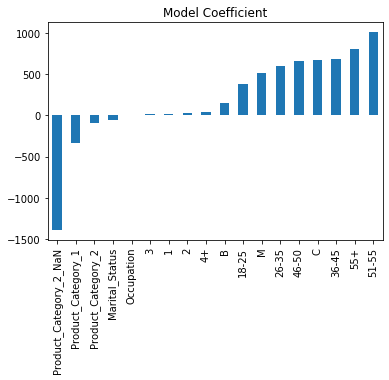

In [26]:
from sklearn.linear_model import LinearRegression
model= LinearRegression(normalize= True)
train(model, X, y)
coef= pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficient")

## 3.Decision Tree

In [27]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
# model= DecisionTreeRegressor()
# train(model, X, y)
# coef= pd.Series(model.feature_importances_, X.columns).sort_values()
# coef.plot(kind='bar', title="Feature Importance")


In [34]:
# plt.figure(figsize=(15,10))
# tree.plot_tree(model, filled=True)

## 4. Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model= RandomForestRegressor()
train(model, X, y)
# coef= pd.Series(model.feature_importances_, X.columns).sort_values()
# coef.plot(kind='bar', title="Feature Importance")

Train RMSE is:  2545.7597031158334
Test cv RMSE score:  3018.448272574897
Training r2_score:  0.7434056020036803
Test cv r2_score:  0.6383111595690829


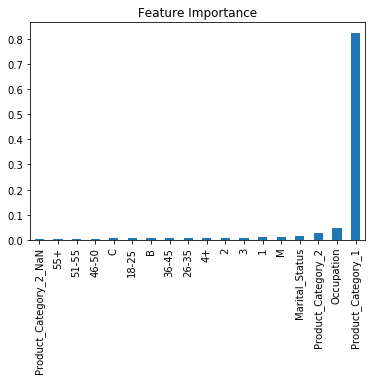

In [29]:
coef= pd.Series(model.feature_importances_, X.columns).sort_values()
coef.plot(kind='bar', title="Feature Importance")

### Gradient boosting 

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
model= GradientBoostingRegressor()
train(model, X, y)

Train RMSE is:  2992.1639566500567
Test cv RMSE score:  3008.0818400190306
Training r2_score:  0.6455270256568637
Test cv r2_score:  0.640761433610227


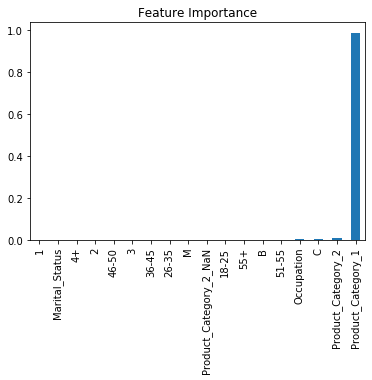

In [31]:
coef= pd.Series(model.feature_importances_, X.columns).sort_values()
coef.plot(kind='bar', title="Feature Importance")

### XGBoost

In [22]:
from xgboost import XGBRegressor
model= XGBRegressor()
train(model, X, y)


Train RMSE is:  2880.5338001466544
Test cv RMSE score:  2924.8442398346824
Training r2_score:  0.6714826535148806
Test cv r2_score:  0.660358284253593


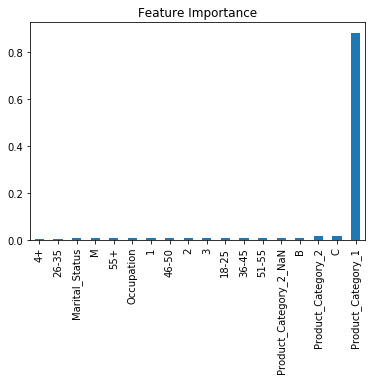

In [23]:
coef= pd.Series(model.feature_importances_, X.columns).sort_values()
coef.plot(kind='bar', title="Feature Importance")

In [12]:
import pickle

In [25]:
with open('xgboost_pickle_model', 'wb') as f:
    pickle.dump(model, f)

In [13]:
with open('xgboost_pickle_model', 'rb') as f:
    mp= pickle.load(f)

In [34]:
testdata= pd.read_csv("black_friday_test.csv")

In [35]:
testdata.drop(['Product_Category_3'], axis=1, inplace=True)
testdata['Product_Category_2_NaN']= np.where(testdata['Product_Category_2'].isnull(),1,0)
testdata['Product_Category_2'].fillna(testdata.Product_Category_2.median(), inplace=True)

testdata_Age= pd.get_dummies(testdata.Age, drop_first=True)
testdata= pd.concat([testdata, testdata_Age], axis=1)
testdata.drop("Age", axis=1, inplace= True)

testdata_City_Category= pd.get_dummies(testdata.City_Category, drop_first=True)
testdata= pd.concat([testdata, testdata_City_Category], axis=1)
testdata.drop("City_Category", axis=1, inplace= True)

testdata_Gender= pd.get_dummies(testdata.Gender, drop_first=True)
testdata= pd.concat([testdata, testdata_Gender], axis=1)
testdata.drop("Gender", axis=1, inplace= True)

testdata_Stay_In_Current_City_Years= pd.get_dummies(testdata.Stay_In_Current_City_Years, drop_first=True)
testdata= pd.concat([testdata, testdata_Stay_In_Current_City_Years], axis=1)
testdata.drop("Stay_In_Current_City_Years", axis=1, inplace= True)

# testdata.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)


In [36]:
testdata.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_2_NaN,18-25,26-35,36-45,46-50,51-55,55+,B,C,M,1,2,3,4+
0,1000004,P00128942,7,1,1,11.0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
1,1000009,P00113442,17,0,3,5.0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
2,1000010,P00288442,1,1,5,14.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3,1000010,P00145342,1,1,4,9.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1000011,P00053842,1,0,4,5.0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


In [37]:
# pred= mp.predict(testdata)

In [38]:
submission= pd.DataFrame()
submission['User_ID']= testdata['User_ID']
submission['Product_ID']= testdata['Product_ID']

In [39]:
testdata.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)
pred= mp.predict(testdata)

In [40]:
submission['Purchase']= pred
submission.to_csv('submission.csv', index=False)

In [41]:
tt= pd.read_csv("submission.csv")
submission.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,15244.949219
1,1000009,P00113442,11091.174805
2,1000010,P00288442,6549.473145
3,1000010,P00145342,2827.142578
4,1000011,P00053842,2328.752441
